<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/Carlos_ruiz_proyecto_final%2C_m%C3%A9todos_num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Ensenada

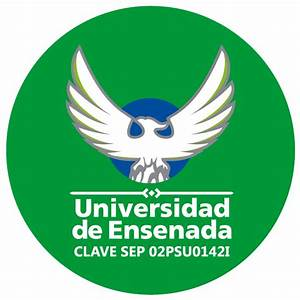

#Materia:
Metodos numericos

#Trabajo final: 
Programacion de metodos vistos

#Docente: 
Roilhi Frajo Ibarra

#Alumno:
 Carlos Ruiz Garcia




Unidad 1: raices de una ecuacion





In [1]:
#primero importamos librerias
import numpy as np # libreria numerica
import matplotlib.pyplot as plt # libreria de graficas
import sympy as sym # libreria de simbologia




calculo del error porcentual, nos servira en todos los ejercicios
$\epsilon_r=\left  \rvert \frac{V_r-Vn}{Vr} \right \rvert \times 100$



In [2]:
#funcion que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((vreal-vnum)/vreal)*100
  return epsilon

* Metodo de biseccion 
Estimar la raiz de la funcion $f(x)=2\sin(x+5)-\cos(x-3)$ en el intervalo $[0,2]$

In [3]:
#definir los valores iniciales
a=0
b=2
Vanalitico = 1.1401
def fx(x_i):
  fx = 2*np.sin(x_i-5)-np.cos(x_i-3)
  return fx


In [4]:
numIter = 0
N = int(input('Defina un numero N de iteraciones '))
x_old = 0
while numIter<N:
  x_i= (a+b)/2
  if fx(a)*fx(x_i)<0:
    b=x_i
  elif fx(a)*fx(x_i)==0:
    raizAproxBisec = x_i 
  else:
    a = x_i
  numIter = numIter+1
  raizAproxBisec = x_i 
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("La raiz estimada por el metodo de biseccion es =",+raizAproxBisec,"iteracion i=",+numIter)
  print("el error relativo es =",+ErrorBisec,"iteracion i=",+numIter)


Defina un numero N de iteraciones 5
La raiz estimada por el metodo de biseccion es = 1.0 iteracion i= 1
el error relativo es = 100.0 iteracion i= 1
La raiz estimada por el metodo de biseccion es = 1.5 iteracion i= 2
el error relativo es = 33.33333333333333 iteracion i= 2
La raiz estimada por el metodo de biseccion es = 1.75 iteracion i= 3
el error relativo es = 14.285714285714285 iteracion i= 3
La raiz estimada por el metodo de biseccion es = 1.625 iteracion i= 4
el error relativo es = 7.6923076923076925 iteracion i= 4
La raiz estimada por el metodo de biseccion es = 1.6875 iteracion i= 5
el error relativo es = 3.7037037037037033 iteracion i= 5


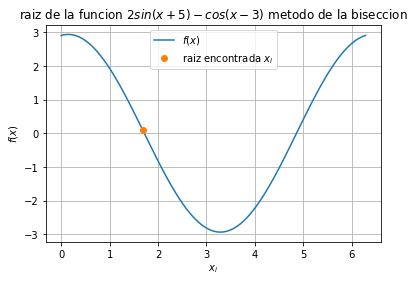

In [5]:
#datos de graficacion
ejeX = np.linspace(0,2*np.pi,101)
#graficar la funcion
plt.plot(ejeX,fx(ejeX),label = '$f(x)$')
#graficar la raiz encontrada en la raiz
plt.plot(raizAproxBisec,fx(raizAproxBisec),'o',label = 'raiz encontrada $x_i$')
plt.xlabel('$x_i$')
plt.ylabel('$f(x)$')
plt.title('raiz de la funcion $2sin(x+5)-cos(x-3)$ metodo de la biseccion')
plt.legend() #muestra la leyenda
plt.grid() #muestra la cuadricula
plt.show() #muestra la grafica





Unidad 2

Tema: interpolación y regresión numéricas

Ejercicio: Interpolación de Lagrange


Se reformula el polinomio de Newton evitando el cálculo de las
diferencias divididas
$\displaystyle f_n(x)=\sum_{i=0}^N L_i(x)f(xi)$

Donde los valores Li’s son los coeficientes de Lagrange y se
calculan mediante:
$L_i(x)=\prod_{j=o,j≠1}^n \frac { x -x_j}{x_i -x_j}$




In [6]:
#ingresamos los valores
xi = np.array([1, 3, 5, 7])
fi = np.array([-2, 1, 2, 3])
#este arreglo nos permite crear una matriz

In [7]:
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x') # creamos una exprexion simbolica
polinomio = 0
divisorL = np.zeros(n, dtype = float)
#zero, nos devuelve una nueva matriz de forma y tipo dados, llena de ceros 
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador
    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador
# simplifica el polinomio
polisimple = polinomio.expand()
# para evaluación numérica
px = sym.lambdify(x,polisimple)#este arrego no s convierte en una funcion analga

In [8]:
# definimos los puntos para la gráfica
muestras = 101
a = np.min(xi)# valor maximo de nuestra matriz
b = np.max(xi)#valor minimo de nuestra matriz
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

In [9]:
# volores de salida
print('valores de fi: ',fi)
print('valores de xi',xi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)


valores de fi:  [-2  1  2  3]
valores de xi [1 3 5 7]
divisores en L(i):  [-48.  16. -16.  48.]

Polinomio de Lagrange, expresiones
(x - 7)*(x - 5)*(x - 3)/24 + (x - 7)*(x - 5)*(x - 1)/16 - (x - 7)*(x - 3)*(x - 1)/8 + (x - 5)*(x - 3)*(x - 1)/16

Polinomio de Lagrange: 
x**3/24 - 5*x**2/8 + 83*x/24 - 39/8


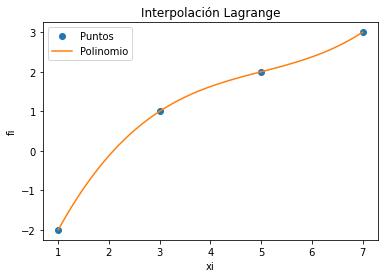

In [10]:
# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

unidad 4

**integración y diferenciación**

Ejercicio: Simpson 3/4




Encontra el área bajo la curva de $f(x)=\int_{-3}^{5}(4x-3)^3 dx=$



**REGLA DE SIMPSON 1/3**

$I≈(b-a)\frac{(f(x_0)+4f(x_1)+f(x_2))}{6}$

$I=(b-a)[\frac{(f(a)+f(b))}{2}]$



In [11]:
#ingresamos las funcion que vamos a utilizar
def f(x):
  return (4*x-3)**3


In [16]:
# una vez definida la funcion se utilizara el metodo de simpson 3/4
def simpson13(f,x_0,X_1,x_2):
  integralS = ((b-a)/6)*(f(x_0)+4*f(x_1)+f(x_2))
  return integralS
  
  # tengo un error de sintaxis invalida, no lo encontre
  #se creo una cadena de errores que suma, simpson13 no esten definidas
  #ya habia funcionado, pero por cuestion de timpo asi lo subire

In [17]:
#ingresamos valores
a = -3
b = 5
h = (b-a)/2
x_0 = a
x_1 = h
x_2 = b
n = 2
h = (b-a)/n
for i in range(n):
  area = simpson13(f, x_0, x_1, x_2)
  suma = area

In [18]:
#valores del error porcentual
vnum = suma
vreal = 2056
errorsim = abs((vreal-vnum)/vreal)*100



In [19]:
#valores de salida
print('i=',+suma)
print('Er%',+errorsim)
  

i= 13768.0
Er% 569.6498054474708


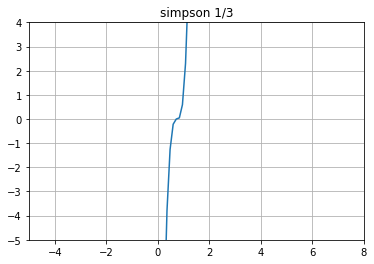

In [21]:
#grafica
ejex = np.linspace(-6,6,101)
plt.plot(ejex,f(ejex))#grafica la funcion')
plt.title('simpson 1/3')
#plt.legend() #muestra la leyenda
plt.xlim(-5, 8)#intervalo del eje x que queremos que se nos muestre
plt.ylim(-5,4)#intervalo del eje y que queremos que se nos muestre
plt.grid() #muestra la cuadricula
plt.show() #muestra la grafica

**Unidad 4**

Sistemas de ecuaciones lineales

Ejercicio: metodo de liminación Gauss-Jordan





Demostrar que:
x=2, y=1, z=-2

son las soluciones para los siguientes sistemas de Soluciones

x+2y+z=2

3x+8y+z=12

4y+z=2




In [22]:
#Ingresar valore
A = np.array([[1,2,1],
             [3,8,1],
             [0,4,1]])
B = np.array([[2],
     [12],
     [2]])


In [23]:
# procedimiento gauss jordan
cero = 1e-15 # se considera valor 0
# este arreglo es para evitar un truncamiento
A = np.array(A,dtype=float) 


In [25]:
#se procede al matriz aumentada
AB = np.concatenate ((A,B),axis=1) # este arreglo une la secuncia de matrices A,B
# pivoteo parcial por filas
tamaño = np.shape(AB) # arreglo que devuelve la forma a la matriz
# este arreglo es necesario si se necesita intercambiar filas
#aunque en este ejercio no se utilizo
n = tamaño[0]
m = tamaño[1]
# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB0[i:,i])
    dondemax = np.argmax(columna) 
    # arreglo que deevuelve los índices de los valores máximos a lo largo de un eje
    
    if (dondemax !=0):
        # intercambia filas
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal

In [26]:
#orden donde empezamos a ser nuestros primers 0 en la párter inferior
AB1 = np.copy(AB)
# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i+1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = np.copy(AB)

In [27]:
# convertimos en los valore en 1 en la diagonal principal
# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = np.copy(AB[:,ultcolumna])
X = np.transpose([X])

In [28]:
# valores de salida
print('valores de A')
print(A)
print('valores de B')
print(B)
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

valores de A
[[1. 2. 1.]
 [3. 8. 1.]
 [0. 4. 1.]]
valores de B
[[ 2]
 [12]
 [ 2]]
Matriz aumentada:
[[ 1.  2.  1.  2.]
 [ 3.  8.  1. 12.]
 [ 0.  4.  1.  2.]]
Pivoteo parcial por filas
[[ 3.  8.  1. 12.]
 [ 1.  2.  1.  2.]
 [ 0.  4.  1.  2.]]
eliminacion hacia adelante
[[  3.           8.           1.          12.        ]
 [  0.          -0.66666667   0.66666667  -2.        ]
 [  0.           0.           5.         -10.        ]]
eliminación hacia atrás
[[ 1.  0.  0.  2.]
 [-0.  1. -0.  1.]
 [ 0.  0.  1. -2.]]
solución de X: 
[[ 2.]
 [ 1.]
 [-2.]]
